# 라이브러리 가져오기 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mpl

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인
mpl.rcParams['axes.unicode_minus'] = False

['NanumGothic'] 10.0


# PCA 주성분 분석
- 고차원의 데이터를 저차원으로 변환
- 최대한 중요한 정보를 유지 (원래데이터의 분산)
- 분산을 기준으로 방향성을 찾는다.
  + 가장 분산이 큰 방향을 첫번째 주성분(PC1)
  + 두번째 주성분(PC2)
  + PC1과 PC2가 서로 직교(90도) 하도록 선택
- PCA 수행과정
  + 데이터 정규화 (평균 0, 분산 1로) 조정
  + 공분산 행렬 계산 (상관성)
  + 고유값(Eigenvalues)-방향성, 고유벡터(Eigenvectors)-축 계산
  + 고유값이 큰 순서대로 주성분 선택, 95% 임계점
- PCA의 장단점
  + 장점 : 차원 줄임 ==> feature 갯수 줄어듬 ==> 연산 속도 향상, 다중공선성 문제 해결
  + 단점
    - 주성분이 기존 변수의 조합인데, 실제 의미를 찾기 어려울 수 있음
    - 비선형 관계를 반영하지 못함, 범주형 변수가 많으면 사용 불가

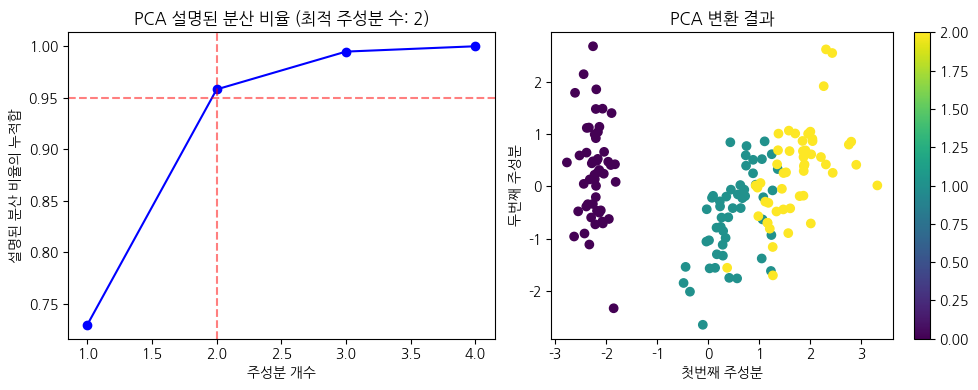

In [3]:
def visualize_pca_components(X, y, feature_names):
    """
    PCA 결과를 시각화하는 함수
    
    Parameters:
    -----------
    X : array-like
        입력 데이터
    y : array-like 
        타겟 데이터
    feature_names : list
        특성 이름 리스트
    """
    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA 수행
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # 설명된 분산 비율 시각화
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    # 주성분 개수에 따른 설명된 분산 비율의 누적합 계산
    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    # 95% 이상의 분산을 설명하는 최소 주성분 개수 찾기
    n_components_95 = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
    
    # 라인 차트 그리기
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             explained_variance_ratio_cumsum, 'bo-')
    
    # 95% 지점 표시
    plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=n_components_95, color='r', linestyle='--', alpha=0.5)
    
    plt.xlabel('주성분 개수')
    plt.ylabel('설명된 분산 비율의 누적합')
    plt.title(f'PCA 설명된 분산 비율 (최적 주성분 수: {n_components_95})')
    
    # 첫 두 개의 주성분으로 데이터 산점도 시각화
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.xlabel('첫번째 주성분')
    plt.ylabel('두번째 주성분')
    plt.title('PCA 변환 결과')
    plt.colorbar(scatter)
    
    plt.tight_layout()
    plt.show()

iris = load_iris()
X = iris.data
y = iris.target

feature_names = iris.feature_names
# PCA 시각화 함수 호출 
visualize_pca_components(X, y, feature_names)

# PCA biplot() 차트 작성

# 재구성오차 개념
- 정의
  + 원본 데이터와 PCA로 재구성한 데이터 간의 차이
  + 차원 축소 과정에서 발생하는 정보 손실량을 측정
- 계산방법
  + 원본 데이터 => PCA 변환 => 역변환 => 원본과 비교
  + X : 원본데이터
  + X_reverse : PCA로 재구성한 데이터
  + Error = (X - X_reverse)^2
- 에러값 해석
  + 오차가 크면 클수록 이상치 가능성 높음 (1에 가까울 수록)
  + 오차가 0에 가까우면 정상 데이터

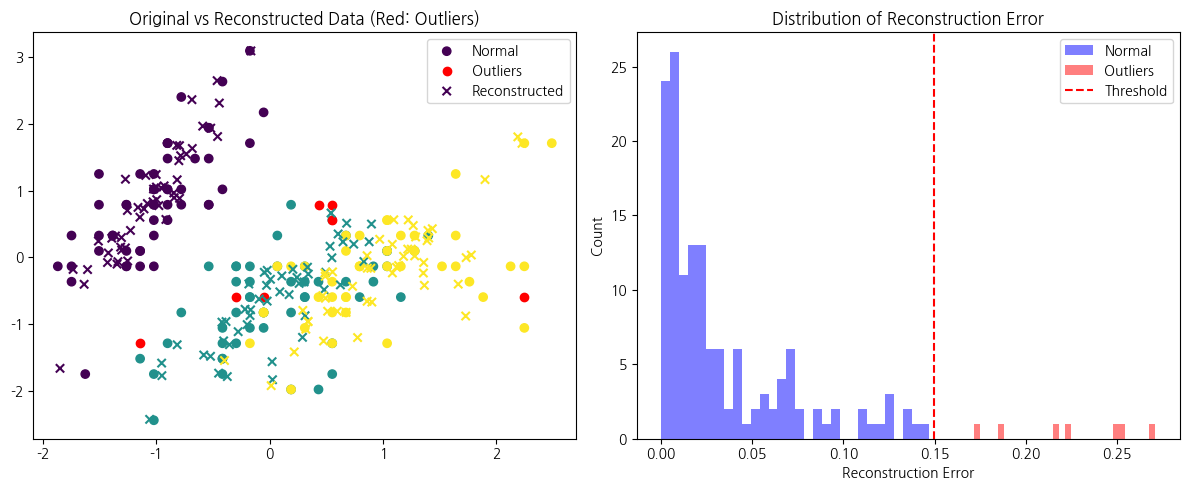

평균 재구성 오차: 0.0419
설명된 분산 비율: [0.72962445 0.22850762]
이상치 개수: 7


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 원본 차원으로 재구성
X_reconstructed = pca.inverse_transform(X_pca)

# 재구성 오차 계산
reconstruction_error = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# 이상치 임계값 설정 (예: 평균 + 2 * 표준편차)
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)
outliers = reconstruction_error > threshold

# 시각화
plt.figure(figsize=(12, 5))

# 원본 데이터와 재구성된 데이터 비교 (첫 번째 특성)
plt.subplot(121)
plt.scatter(X_scaled[~outliers, 0], X_scaled[~outliers, 1], c=y[~outliers], label='Normal')
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], c='red', label='Outliers')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, marker='x', label='Reconstructed')
plt.title('Original vs Reconstructed Data (Red: Outliers)')
plt.legend()

# 재구성 오차 분포
plt.subplot(122)
plt.hist(reconstruction_error[~outliers], bins=30, alpha=0.5, color='blue', label='Normal')
plt.hist(reconstruction_error[outliers], bins=30, alpha=0.5, color='red', label='Outliers')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Distribution of Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

print(f"평균 재구성 오차: {np.mean(reconstruction_error):.4f}")
print(f"설명된 분산 비율: {pca.explained_variance_ratio_}")
print(f"이상치 개수: {np.sum(outliers)}")
